In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [8]:
# Read the country mapping from the JSON file
with open("../country_mapping.json", "r") as json_file:
    country_mapping = json.load(json_file)

# Login Location

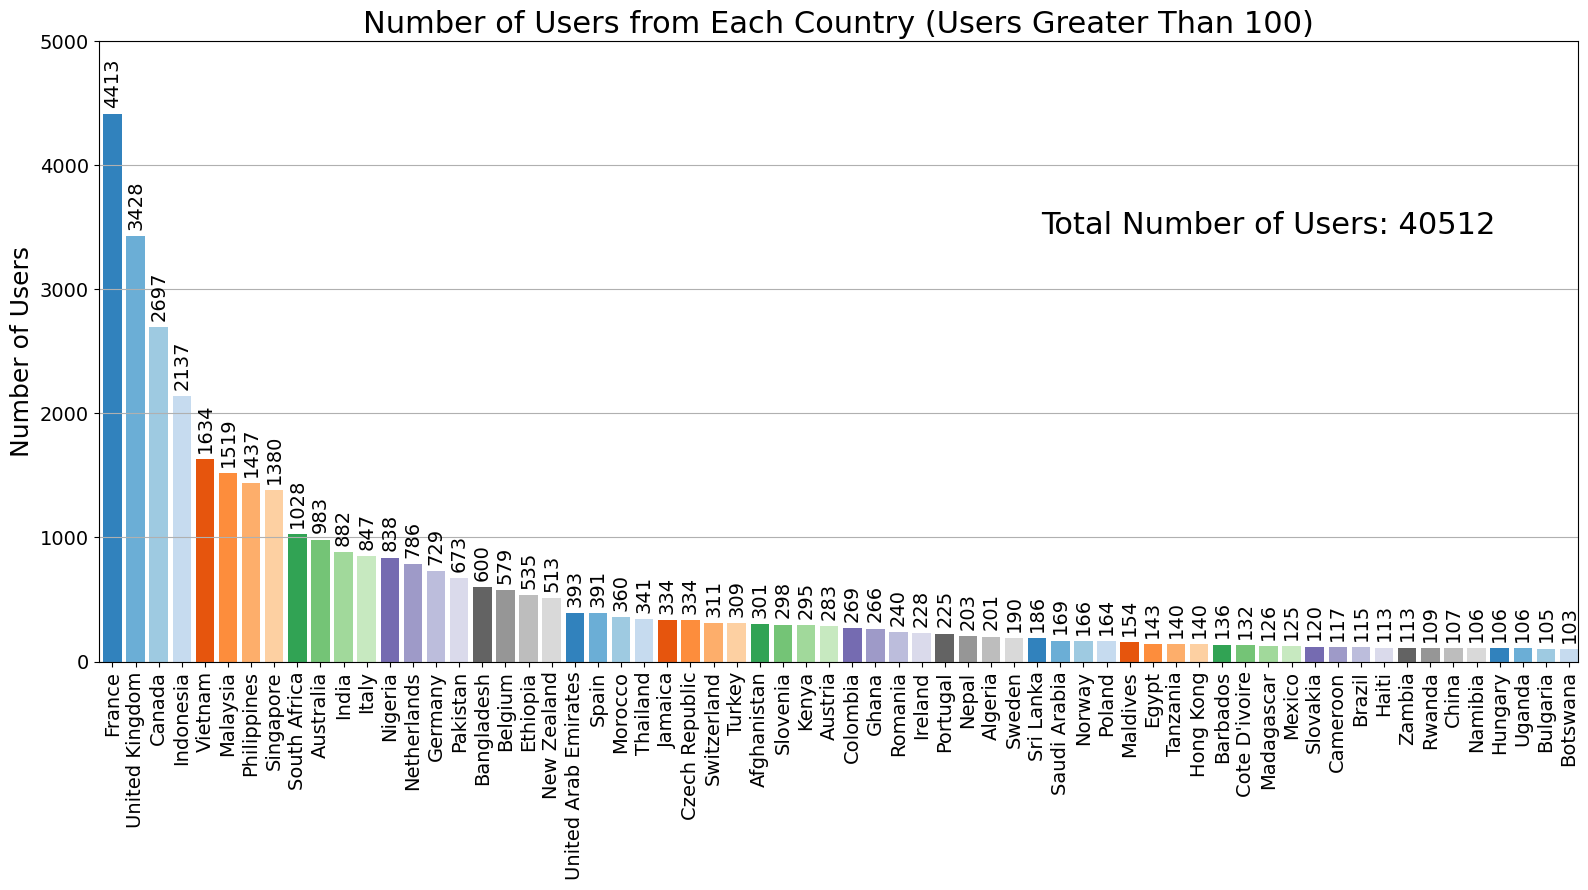

In [9]:
# Load Excel file into a DataFrame
df_login = pd.read_csv("../Dataset/login.csv")

# Replace country names
df_login['country'] = df_login['country'].replace(country_mapping)

# Count occurrences of each country
country_counts = df_login['country'].value_counts()

# Filter out countries with fewer than 100 occurrences
country_counts_filtered = country_counts[country_counts >= 100]

# Define colors for each country
colors = plt.cm.tab20c.colors[:len(country_counts_filtered)]

# Plot the counts
plt.figure(figsize=(16, 9))
bars = plt.bar(country_counts_filtered.index, country_counts_filtered.values, color=colors, width=0.8)
""
# Add labels with values
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, int(bar.get_height()), ha='center', va='bottom', rotation=90, fontsize=14)

plt.title('Number of Users from Each Country (Users Greater Than 100)', fontsize=22)
plt.ylabel('Number of Users', fontsize=18)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.ylim([0, 5000])
plt.xlim(left=-0.6, right=len(country_counts_filtered)-0.6)

plt.text(50, 3400, f'Total Number of Users: {len(df_login)}', ha='center', va='bottom', fontsize=22)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


User Registrations Over Time

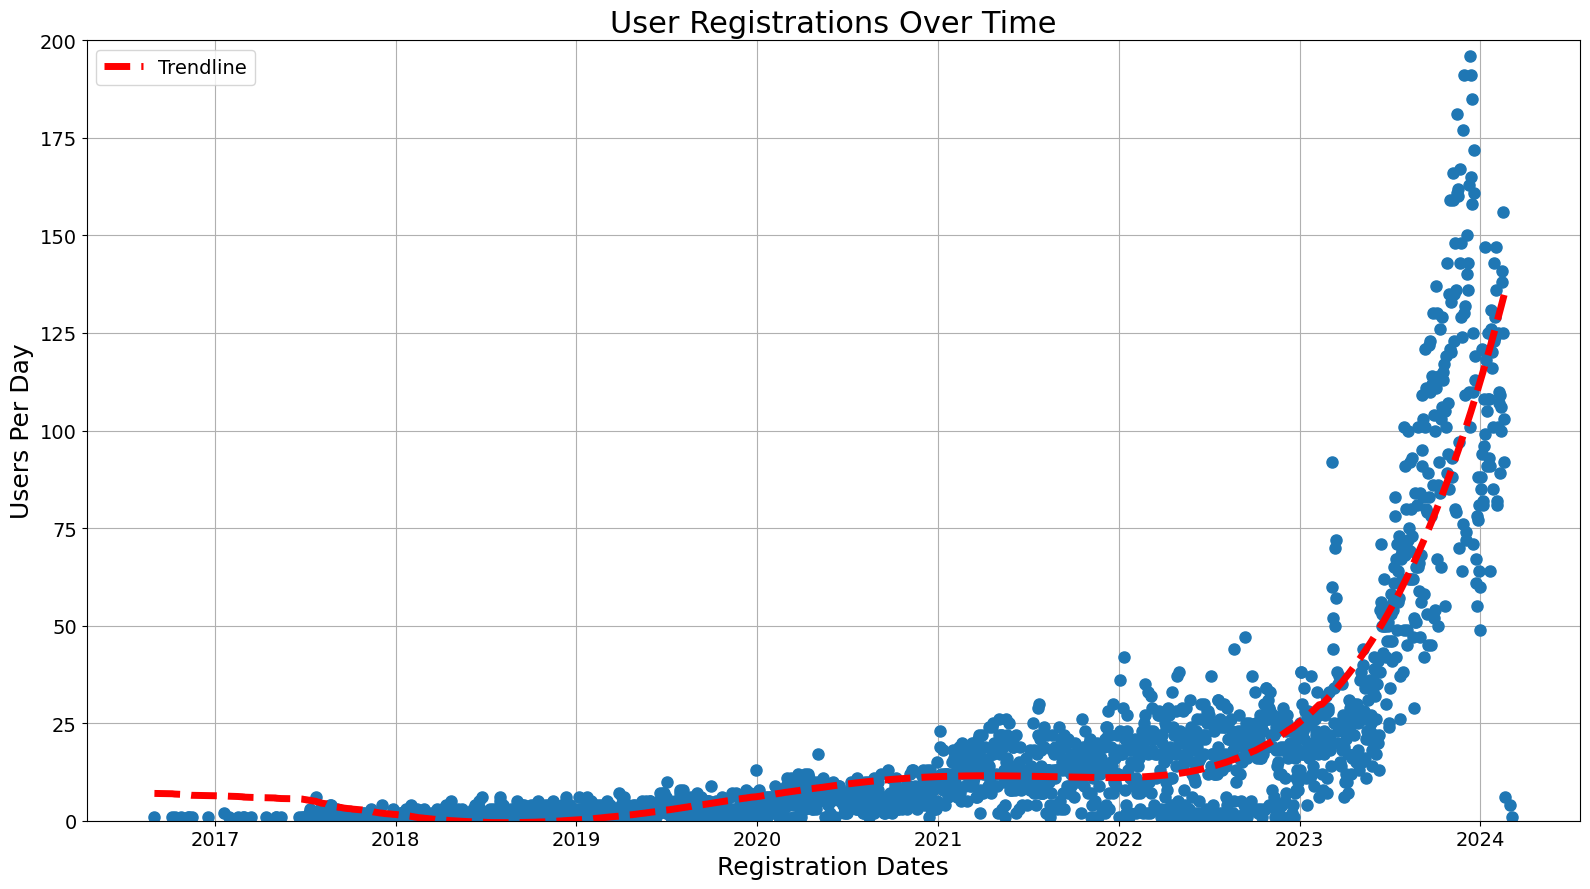

In [10]:
# Convert reg_date to datetime
df_login['reg_date'] = pd.to_datetime(df_login['reg_date'], unit='s')

# Group by registration date and count occurrences
registration_counts = df_login.groupby(df_login['reg_date'].dt.date).size().reset_index(name='occurrences')

# Calculate linear regression
regression_coef = np.polyfit(np.arange(len(registration_counts)), registration_counts['occurrences'], 4)
regression_line = np.polyval(regression_coef, np.arange(len(registration_counts)))

# Plotting
plt.figure(figsize=(16, 9))
plt.plot(registration_counts['reg_date'], registration_counts['occurrences'], marker='o', linestyle='', markersize=8)
plt.plot(registration_counts['reg_date'], regression_line, color='red', linewidth=5, linestyle='--', label='Trendline')
plt.title('User Registrations Over Time', fontsize=22)
plt.xlabel('Registration Dates', fontsize=18)
plt.ylabel('Users Per Day', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.ylim([0, 200])
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

# Trades Per Day

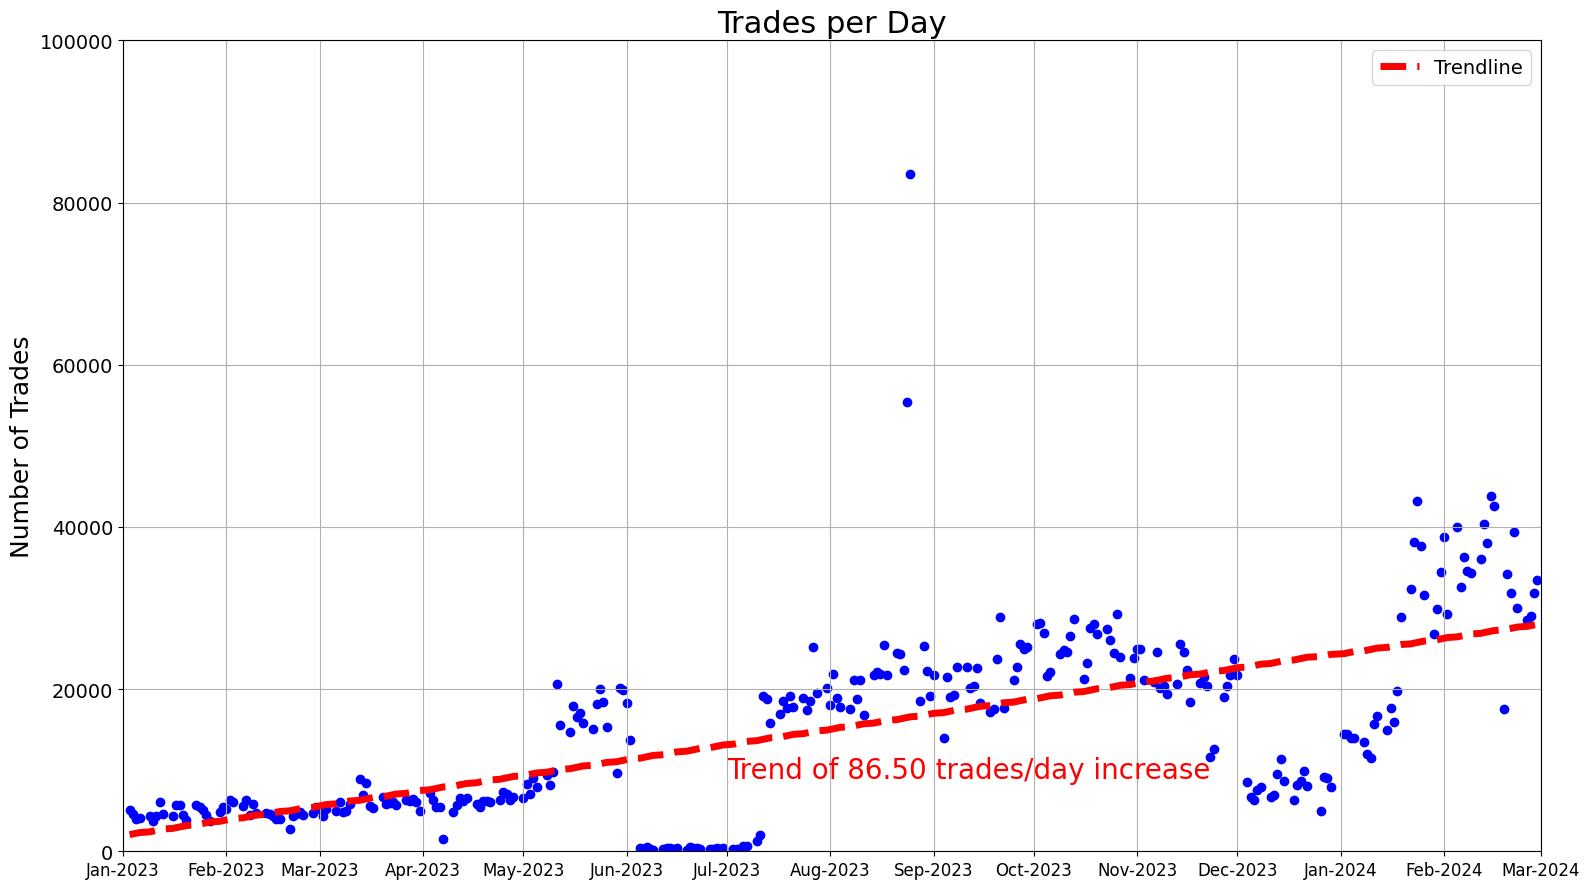

In [13]:
from matplotlib.dates import MonthLocator, DateFormatter

trades_dataframe = pd.read_csv("../Dataset/trades.csv")

# Convert open_time and close_time to datetime objects
trades_dataframe['open_time'] = pd.to_datetime(trades_dataframe['open_time'], unit='s')
trades_dataframe['close_time'] = pd.to_datetime(trades_dataframe['close_time'], unit='s')

# Extract the date from the open_time column
trades_dataframe['date'] = trades_dataframe['open_time'].dt.date

# Calculate the number of trades per day
trades_per_day = trades_dataframe.groupby('date').size().reset_index(name='trades_count')

# Calculate linear regression
regression_coef = np.polyfit(np.arange(len(trades_per_day)), trades_per_day['trades_count'], 1)
regression_line = np.polyval(regression_coef, np.arange(len(trades_per_day)))

# Create scatter plot
plt.figure(figsize=(16, 9))
plt.scatter(trades_per_day['date'], trades_per_day['trades_count'], color='blue')
plt.plot(trades_per_day['date'], regression_line, color='red', linestyle='--', linewidth=5, label='Trendline')  # Add trendline
plt.title('Trades per Day', fontsize=22)
plt.ylabel('Number of Trades', fontsize=18)

# Set xticks per month and format as 'Jan-2023'
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b-%Y'))

plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=14)

# Add text annotation about the trendline
plt.text(pd.Timestamp('2023-07-01'), 9000, f'Trend of {regression_coef[0]:.2f} trades/day increase', fontsize=20, color='red')

# Set x-axis limits between 2023 and March 2024
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-03-01'))
plt.ylim(0, 100000)

plt.grid(True)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


# Balance Over Time for Users with the Most Trades

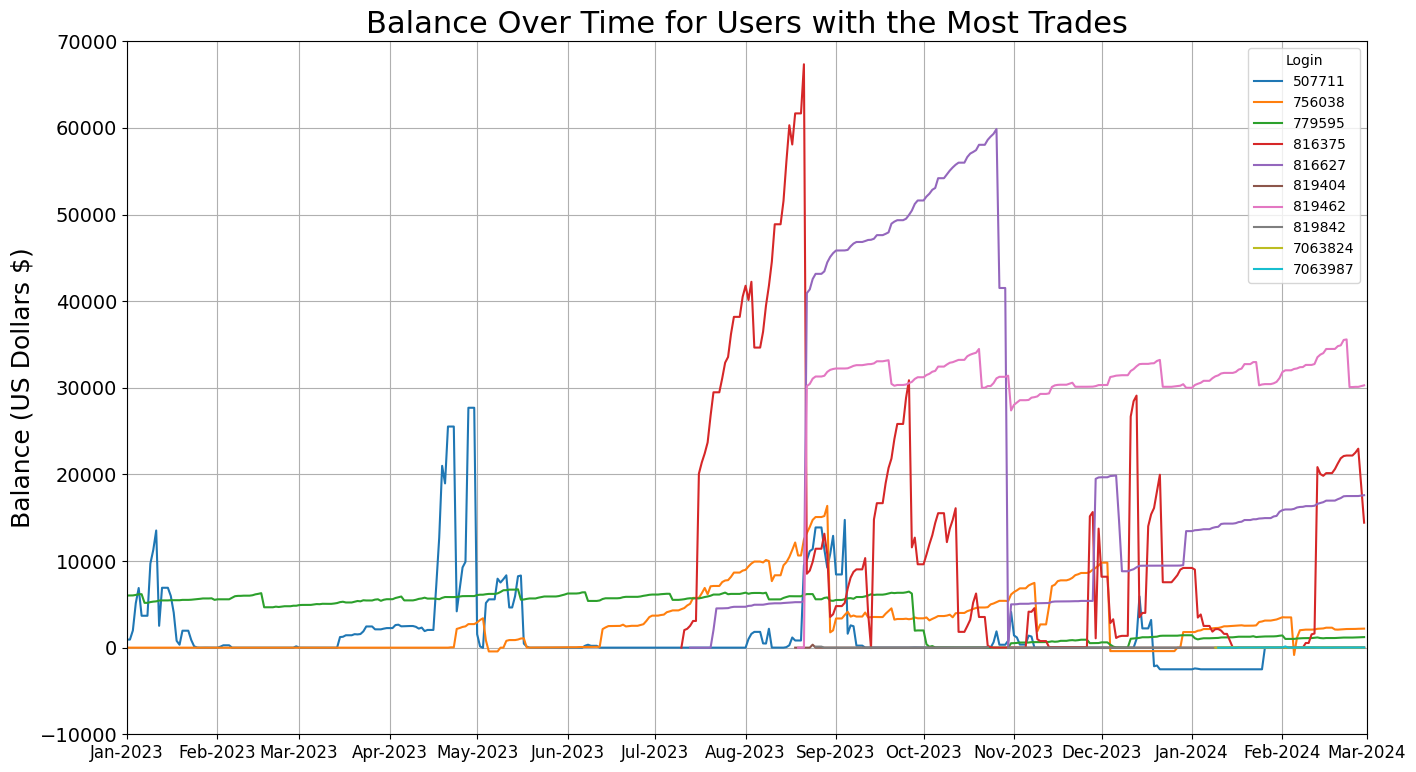

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

trades_dataframe = pd.read_csv("../Dataset/trades.csv")
daily_dataframe = pd.read_csv("../Dataset/daily_report.csv")

# Filter daily_dataframe for the specified time range
daily_dataframe = daily_dataframe[(daily_dataframe['record_time'] >= '2023-01-01') & (daily_dataframe['record_time'] <= '2024-03-01')]

# Count occurrences of each login record
login_counts = trades_dataframe['login'].value_counts()

# Get the 10 most occurring login records
top_logins = login_counts.head(10).index.tolist()

# Filter daily_dataframe for the top login records in login_counts
filtered_daily = daily_dataframe[daily_dataframe['login'].isin(top_logins)].copy()  # Make a copy to avoid SettingWithCopyWarning

# Convert record_time to datetime type using .loc to modify the DataFrame
filtered_daily.loc[:, 'record_time'] = pd.to_datetime(filtered_daily['record_time'])

# Group by login and record_time and calculate the mean balance for each group
grouped = filtered_daily.groupby(['record_time', 'login'])['balance'].mean().unstack()

# Plotting
plt.figure(figsize=(16, 9))
for login in grouped.columns:
    plt.plot(grouped.index, grouped[login], label=str(login))

plt.title('Balance Over Time for Users with the Most Trades', fontsize=22)
plt.ylabel('Balance (US Dollars $)', fontsize=18)
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-03-01'))
plt.ylim([-10000, 70000])

# Set xticks per month and format as 'Jan-2023'
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b-%Y'))

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)

plt.legend(title='Login')
plt.grid(True)
plt.show()
